##### Copyright 2019 Google LLC.

Licensed under the Apache License, Version 2.0 (the "License");

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License"); { display-mode: "form" }
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Introduction to TensorFlow Part 3 - Advanced Tensor Manipulation

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google/tf-quant-finance/blob/master/tf_quant_finance/examples/jupyter_notebooks/Introduction_to_TensorFlow.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/google/tf-quant-finance/blob/master/tf_quant_finance/examples/jupyter_notebooks/Introduction_to_TensorFlow.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [0]:
#@title Install and import Libraries for this colab. RUN ME FIRST!
!pip install matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf

tf.disable_eager_execution()



# What this notebook covers

This notebook carries on from [part 2](https://colab.research.google.com/github/google/tf-quant-finance/blob/master/tf_quant_finance/examples/jupyter_notebooks/Introduction_to_TensorFlow_Part_2_-_Debugging_and_Control_Flow.ipynb
), and covers various advanced ways of manipulating tensors, including
*   Scatter/Gather
*   Sparse Tensors
*   Various functional ops





# Scatter / Gather

## tf.gather_nd

[Full documentation](https://www.tensorflow.org/api_docs/python/tf/gather_nd)

This operation allows you to take a multi-dimensional tensor and extract a list of subsets of data from it, according to a list of indices.

In [0]:
source = tf.constant([[[111,112,113], [121,122,123], [131,132,133]], 
                      [[211,212,213], [221,222,223], [231,232,233]]])

with tf.Session() as sess:
  # if we specify all values for all of source's dimensions, then we get a 
  # single value
  indices = [[1,1,1]]
  print("Looking up %s gives us\n%s" %(
      indices, sess.run(tf.gather_nd(source, indices))))

  # we can look up multiple sets of indices
  indices = [[1,1,1], [0,0,0], [0,0,1]]
  print("\nLooking up %s gives us\n%s" %(
      indices, sess.run(tf.gather_nd(source, indices))))

  # if we don't specify values for all of source's dimensions, then we get 
  # results of larger shape
  indices = [[0,0]]
  print("\nLooking up %s gives us\n%s" %(
      indices, sess.run(tf.gather_nd(source, indices))))  
  indices = [[1]]
  print("\nLooking up %s gives us\n%s" %(
      indices, sess.run(tf.gather_nd(source, indices))))    

Looking up [[1, 1, 1]] gives us
[222]

Looking up [[1, 1, 1], [0, 0, 0], [0, 0, 1]] gives us
[222 111 112]

Looking up [[0, 0]] gives us
[[111 112 113]]

Looking up [[1]] gives us
[[[211 212 213]
  [221 222 223]
  [231 232 233]]]


The indices can easily be generated with tf.where_v2:

In [0]:
source = tf.constant([[[111,112,113], [121,122,123], [131,132,133]], 
                      [[211,212,213], [221,222,223], [231,232,233]]])
values_divisible_by_three = tf.gather_nd(
    source, tf.where_v2(tf.equal(0, source % 3)))

with tf.Session() as sess:
  print(sess.run(values_divisible_by_three))

[111 123 132 213 222 231]


##tf.scatter_nd

[Full documentation](https://www.tensorflow.org/api_docs/python/tf/scatter_nd)

scatter_nd creates a zero-initialised tensor of a given shape, and then writes a series of specified values at specified positions in that tensor.



In [0]:
source = tf.constant([[[111,112,113], [121,122,123], [131,132,133]], 
                      [[211,212,213], [221,222,223], [231,232,233]]])

with tf.Session() as sess:
  print("Scattering single value:\n%s"%sess.run(
      tf.scatter_nd(
          indices = [[0,1,2]], 
          updates = [1], 
          shape = [2,3,3])))

  print("\nScattering multiple values:\n%s"%sess.run(
      tf.scatter_nd(
          indices = [[0,0,0], [0,1,1], [0,2,2]], 
          updates = [1,2,3], 
          shape = [2,3,3])))

  # You can reduce the dimensions of indices and increase the dimensions of 
  # updates
  print("\nScattering entire rows:\n%s"%sess.run(
      tf.scatter_nd(
          indices = [[0,0], [0,1]], 
          updates = [[1,2,3], [4,5,6]], 
          shape = [2,3,3])))
  
  print("\nScattering entire matrix:\n%s"%sess.run(
      tf.scatter_nd(
          indices = [[0]], 
          updates = [[[1,2,3], [4,5,6], [7,8,9]]], 
          shape = [2,3,3])))
  
  # Note that if indices contains duplicate or overlapping values, then the 
  # clashing updates will be added together (in an indeterminate order, which 
  # may result in non-deterministic output in the case of multiple floating 
  # point values of wildly different sizes).
  print("\nScattering single value multiple times:\n%s"%sess.run(
      tf.scatter_nd(
          indices = [[0,0,0], [0,0,0], [0,0,0]], 
          updates = [1,2,3], 
          shape = [2,3,3])))



Scattering single value:
[[[0 0 0]
  [0 0 1]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]]

Scattering multiple values:
[[[1 0 0]
  [0 2 0]
  [0 0 3]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]]

Scattering entire rows:
[[[1 2 3]
  [4 5 6]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]]

Scattering entire matrix:
[[[1 2 3]
  [4 5 6]
  [7 8 9]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]]

Scattering single value multiple times:
[[[6 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]]


### Gather then Scatter
In some cases, you will want scatter_nd to act as a "setter" to gather_nd's "getter": i.e. you have a tensor, you extract a subset of values that meet a certain criteria using gather_nd, you calculate new values for that subset, and then create a new tensor based on the original that replaces the elements that met the criteria with the new values.

There are two approaches you can take here, the first is to use where_v2:

In [0]:
source = tf.constant([[[111,112,113], [121,122,123], [131,132,133]], 
                      [[211,212,213], [221,222,223], [231,232,233]]])
# create a boolean tensor the same shape as source
is_divisible_by_three = tf.equal(0, source % 3)
# create a list of indices where is_divisible_by_three is true
indices = tf.where_v2(is_divisible_by_three)
# extract a list of values that need updating
values_divisible_by_three = tf.gather_nd(source, indices)
# perform a really expensive operation on those values
new_values = values_divisible_by_three % 100
# convert the list of new values back into a tensor the same shape as source
# we need to force the type of shape to match that of indices
shape = tf.shape(source, out_type=tf.dtypes.int64)
new_values_or_zeros = tf.scatter_nd(indices, new_values, shape)
# merge the new values into the original
new_tensor = tf.where_v2(is_divisible_by_three, new_values_or_zeros, source)

with tf.Session() as sess:
  print (sess.run(new_tensor))


[[[ 11 112 113]
  [121 122  23]
  [131  32 133]]

 [[211 212  13]
  [221  22 223]
  [ 31 232 233]]]


The second approach is to subtract the original value from the updated value, and then you can just add the two tensors.

In [0]:
source = tf.constant([[[111,112,113], [121,122,123], [131,132,133]], 
                      [[211,212,213], [221,222,223], [231,232,233]]])
# create a list of indices where is_divisible_by_three is true (we no longer 
# need the to keep a reference to the result of tf.equal)
indices = tf.where_v2(tf.equal(0, source % 3))
# extract a list of values that need updating
values_divisible_by_three = tf.gather_nd(source, indices)
# perform a really expensive operation on those values to get the value we want
new_values = values_divisible_by_three % 100
new_values_minus_original = new_values - values_divisible_by_three
# convert the list of new values back into a tensor the same shape as source
# we need to force the type of shape to match that of indices
shape = tf.shape(source, out_type=tf.dtypes.int64)
new_values_or_zeros = tf.scatter_nd(indices, new_values_minus_original, shape)
# now add the two tensors. For values that didn't meet the criteria this just 
# add 0 to the original value. For the values that did meet the criteria this 
# will add original_value + (value_we_want - original value)
new_tensor = new_values_or_zeros + source

with tf.Session() as sess:
  print (sess.run(new_tensor))


[[[ 11 112 113]
  [121 122  23]
  [131  32 133]]

 [[211 212  13]
  [221  22 223]
  [ 31 232 233]]]


The addition approach is fractionally more efficient, and doesn't require the boolean tensor, but can hit accuracy problems in floating point.

### tf.scatter_nd_add/sub/update

There are several other scatter_nd functions in tensorflow which are superficially similar to ```tf.scatter_nd```. They work using [Variables](https://www.tensorflow.org/guide/variables) which can have significant scalability/contention issues with larger graphs, especially when executing across distributed machines/hardware.

## Exercise: Mandlebrot set

Lets revisit the Mandlebrot set from the previous training course. In that solution, we ran the z=z*z+c calculation for all co-ordinates, even the ones whose magnitude had already gone over 2.

For the purpose of this exercise, we will pretend that the complex calculation is very expensive and that we should eliminate the calculation where possible. In actual fact, the calculation is utterly trivial and swamped by the cost of the gather/scatter operations, but the same methods can be used in situations rather more expensive than a complex add and multiply

In [0]:
MAX_ITERATIONS = 64
NUM_PIXELS = 512

def generate_grid(nX, nY, bottom_left=(-1.0, -1.0), top_right=(1.0, 1.0)):
  """Generates a complex matrix of shape [nX, nY].
  
  Generates an evenly spaced grid of complex numbers spanning the rectangle 
  between the supplied diagonal points. 
  
  Args:
    nX: A positive integer. The number of points in the horizontal direction.
    nY: A positive integer. The number of points in the vertical direction.
    bottom_left: The coordinates of the bottom left corner of the rectangle to
      cover.
    top_right: The coordinates of the top right corner of the rectangle to
      cover.

  Returns:
    A constant tensor of type complex64 and shape [nX, nY].
  """
  x = tf.linspace(bottom_left[0], top_right[0], nX)
  y = tf.linspace(bottom_left[1], top_right[1], nY)
  real, imag = tf.meshgrid(x, y)
  return tf.cast(tf.complex(real, imag), tf.complex128)

c_values = generate_grid(NUM_PIXELS, NUM_PIXELS)
initial_Z_values = tf.zeros_like(c_values, dtype=tf.complex128)
initial_diverged_after = tf.ones_like(c_values, dtype=tf.int32) * MAX_ITERATIONS

# You need to put the various values you want to change inside the loop here
loop_vars = (0, initial_Z_values, initial_diverged_after)

# this needs to take the same number of arguments as loop_vars contains and
# return a tuple of equal size with the next iteration's values
def body(iteration_count, Z_values, diverged_after):
  # a matrix of bools showing all the co-ordinatesthat haven't diverged yet
  not_diverged = tf.equal(diverged_after, MAX_ITERATIONS)
  # a list of the indices in not_diverged that are true
  not_diverged_indices = tf.where_v2(not_diverged)

  # you now need to gather just the Z and c values covered by 
  # not_diverged_indices, calculate the new Z values, and then scatter the 
  # values back into a new Z_values matrix to pass to the next iteration.

  new_Z_values = # TODO

  # And now we're back to the original code
  has_diverged = tf.abs(new_Z_values) > 2.0
  new_diverged_after = tf.minimum(diverged_after, tf.where_v2(
      has_diverged, iteration_count, MAX_ITERATIONS))

  return (iteration_count+1, new_Z_values, new_diverged_after)

# this just needs to take the same number of arguments as loop_vars contains and
# return true (we'll use maximum_iterations to exit the loop)
def cond(iteration_count, Z_values, diverged_after):
  return True

loop = tf.compat.v1.while_loop(
    loop_vars=loop_vars, 
    body = body, 
    cond = cond, 
    maximum_iterations=MAX_ITERATIONS)

with tf.Session() as sess:
  results = sess.run(loop)

## extract the final value of diverged_after from the tuple
final_diverged_after = results[-1]
plt.matshow(final_diverged_after)
pass

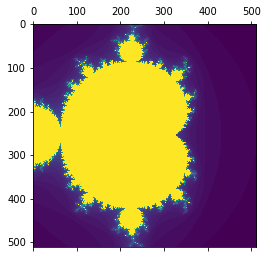

In [0]:
#@title Solution: Mandlebrot set (Double-click to reveal)

MAX_ITERATIONS = 64
NUM_PIXELS = 512

def GenerateGrid(nX, nY, bottom_left=(-1.0, -1.0), top_right=(1.0, 1.0)):
  """Generates a complex matrix of shape [nX, nY].
  
  Generates an evenly spaced grid of complex numbers spanning the rectangle 
  between the supplied diagonal points. 
  
  Args:
    nX: A positive integer. The number of points in the horizontal direction.
    nY: A positive integer. The number of points in the vertical direction.
    bottom_left: The coordinates of the bottom left corner of the rectangle to
      cover.
    top_right: The coordinates of the top right corner of the rectangle to
      cover.

  Returns:
    A constant tensor of type complex64 and shape [nX, nY].
  """
  x = tf.linspace(bottom_left[0], top_right[0], nX)
  y = tf.linspace(bottom_left[1], top_right[1], nY)
  real, imag = tf.meshgrid(x, y)
  return tf.cast(tf.complex(real, imag), tf.complex128)

c_values = GenerateGrid(NUM_PIXELS, NUM_PIXELS)
initial_Z_values = tf.zeros_like(c_values, dtype=tf.complex128)
initial_diverged_after = tf.ones_like(c_values, dtype=tf.int32) * MAX_ITERATIONS

# You need to put the various values you want to change inside the loop here
loop_vars = (0, initial_Z_values, initial_diverged_after)

# this needs to take the same number of arguments as loop_vars contains and
# return a tuple of equal size with the next iteration's values
def body(iteration_count, Z_values, diverged_after):
  # a matrix of bools showing all the co-ordinatesthat haven't diverged yet
  not_diverged = tf.equal(diverged_after, MAX_ITERATIONS)
  # a list of the indices in not_diverged that are true
  not_diverged_indices = tf.where_v2(not_diverged)

  # Gather the values for just the undiverged co-ordinates, and generate the 
  # next iteration's values
  not_diverged_c_values_array = tf.gather_nd(c_values, not_diverged_indices)
  not_diverged_Z_values_array = tf.gather_nd(Z_values, not_diverged_indices)
  new_Z_values_array = (not_diverged_Z_values_array * not_diverged_Z_values_array
                        + not_diverged_c_values_array)
  
  # merge the new values with the already-diverged
  new_Z_values_or_zeroes = tf.scatter_nd(
      not_diverged_indices, 
      new_Z_values_array, 
      tf.shape(Z_values, out_type=tf.dtypes.int64))
  new_Z_values = tf.where_v2(not_diverged, new_Z_values_or_zeroes, Z_values)

  # And now we're back to the original code
  has_diverged = tf.abs(new_Z_values) > 2.0
  new_diverged_after = tf.minimum(diverged_after, tf.where_v2(
      has_diverged, iteration_count, MAX_ITERATIONS))
  return (iteration_count+1, new_Z_values, new_diverged_after)

# this just needs to take the same number of arguments as loop_vars contains and
# return true (we'll use maximum_iterations to exit the loop)
def cond(iteration_count, Z_values, diverged_after):
  return True

loop = tf.compat.v1.while_loop(
    loop_vars=loop_vars, 
    body = body, 
    cond = cond, 
    maximum_iterations=MAX_ITERATIONS)

with tf.Session() as sess:
  results = sess.run(loop)

## extract the final value of diverged_after from the tuple
final_diverged_after = results[-1]
plt.matshow(final_diverged_after)
pass

## SparseTensor

[Full documentation](https://www.tensorflow.org/api_docs/python/tf/sparse/SparseTensor])

A sparse tensor is created from a list of indices, a list of values and a shape: the same as the arguments to scatter_nd. Any element within the tensor that doesn't have an explicit value will be treated as zero. So a sparse tensor can be viewed as a deferred call to scatter_nd.

For large tensors where most of the values are zero, sparse tensors can grant major savings in memory. The [tf.sparse module](https://www.tensorflow.org/api_docs/python/tf/sparse) contains several specialised operations that know how to work with sparse tensor's internals and skipping all the zero values, thus granting major savings in processing speed as well.

Similarly sparse tensors can be efficiently divided or multiplied by a tensor or scalar. But attempts to perform inefficient operations on a sparse tensor (i.e. ones likely to set most elements to a non-zero value) are not allowed. You need to convert the sparse tensor to a normal, or "dense", tensor with the ```tf.sparse.to_dense``` function.

In [0]:
source = tf.constant([[[111,112,113], [121,122,123], [131,132,133]], 
                      [[211,212,213], [221,222,223], [231,232,233]]])
# create a list of indices where is_divisible_by_three is true
indices = tf.where_v2(tf.equal(0, source % 3))
# extract a matching list of values
values_divisible_by_three = tf.gather_nd(source, indices)

with tf.Session() as sess:

  sparse = tf.sparse.SparseTensor(
      indices, 
      values_divisible_by_three, 
      tf.shape(source, out_type=tf.dtypes.int64))
  print ("sparse =")
  print(sess.run(sparse))
  # We can efficiently multiply sparse by a dense tensor
  print ("\nsparse * dense =")
  print(sess.run(sparse * source))
  # We can efficiently multiply a dense tensor by a sparse
  print ("\ndense * sparse")
  print(sess.run(source * sparse))
  # We can efficiently divide sparse by a dense tensor
  print ("\nsparse / dense")
  print(sess.run(sparse / source))

  # But attempts to perform inefficient operations on a sparse tensor (i.e. ones
  # likely to set most elements to a non-zero value) are not allowed.
  # You need to convert the sparse tensor into a dense tensor first.
  try:
    not_allowed = sparse + source
  except TypeError:
    pass
  
  # Running to_dense is exactly the same as calling scatter_nd:
  print ("\nto_dense gives")
  print(sess.run(tf.sparse.to_dense(sparse)))
  print ("\nscatter_nd gives")
  print(sess.run(tf.scatter_nd(sparse.indices, sparse.values, sparse.dense_shape)))

sparse =
SparseTensorValue(indices=array([[0, 0, 0],
       [0, 1, 2],
       [0, 2, 1],
       [1, 0, 2],
       [1, 1, 1],
       [1, 2, 0]]), values=array([111, 123, 132, 213, 222, 231], dtype=int32), dense_shape=array([2, 3, 3]))

sparse * dense =
SparseTensorValue(indices=array([[0, 0, 0],
       [0, 1, 2],
       [0, 2, 1],
       [1, 0, 2],
       [1, 1, 1],
       [1, 2, 0]]), values=array([12321, 15129, 17424, 45369, 49284, 53361], dtype=int32), dense_shape=array([2, 3, 3]))

dense * sparse
SparseTensorValue(indices=array([[0, 0, 0],
       [0, 1, 2],
       [0, 2, 1],
       [1, 0, 2],
       [1, 1, 1],
       [1, 2, 0]]), values=array([12321, 15129, 17424, 45369, 49284, 53361], dtype=int32), dense_shape=array([2, 3, 3]))

sparse / dense
SparseTensorValue(indices=array([[0, 0, 0],
       [0, 1, 2],
       [0, 2, 1],
       [1, 0, 2],
       [1, 1, 1],
       [1, 2, 0]]), values=array([1., 1., 1., 1., 1., 1.]), dense_shape=array([2, 3, 3]))

to_dense gives
[[[111   0   0]
  [ 

# Functional ops

## tf.foldl and tf.foldr

[Full documentation](https://www.tensorflow.org/api_docs/python/tf/foldl)

These two functions split a given tensor across its first dimension. The resulting subtensors are then each passed to an op along with an "accumulator". 
For most iterations, the value of the accumulator will be the result of the previous iteration. But for the first iteration, the accumulator will either be passed an initial value passed into the foldl/foldr call, or the first subtensor. The final iteration's result then becomes the overall result of the op.

So the rough pseudo code of ```x = tf.foldl(op, [[1,1], [2,2], [3,3]], initializer)``` would be
``` python
result_iteration1 = op(initializer, [1,1])
result_iteration2 = op(result_iteration1, [2,2])
result iteration3 = op(result_iteration2, [3,3])
x = result_iteration3
```
Whereas the rough pseudo-code of  ```x = tf.foldl(op, [[1,1], [2,2], [3,3])``` (i.e. no initializer supplied) would be
``` python
result_iteration1 = op([1,1]], [2,2])
result_iteration2 = op(result_iteration1, [3,3])
x = result_iteration3
```

```foldr``` is identical to ```foldl```, except that the order the tensor is iterated through is reversed. So the rough pseudo code of ```x = tf.foldr(op, [[1,1], [2,2], [3,3], initializer)``` would be
``` python
result_iteration1 = op(initializer, [3,3])
result_iteration2 = op(result_iteration1, [2,2])
result iteration3 = op(result_iteration2, [1,1])
x = result_iteration3
```

The only complication of this method is that the op is defined by a python callable. Note that the callable is only called once, at execution time, to build the operation. **Your python callable is not called for every row in the input**, nor can it see the individual values. It is the op created by your python code that will be repeatedly called. 

Note that despite this, use of these methods still eliminates several optimisation opportunities that are present in tensorflow built-in operations. So if you can use something like tf.math.reduce_sum instead of these ops then your code may well run significantly faster.

In [0]:
source = tf.constant([[1,2],[3,4],[5,6]])

# element 
def my_function(previous_iterations_result, element):
  print("In my_function.")
  # this depends on the previous values, thus highlighting the difference 
  # between foldl and foldr
  return tf.math.maximum(
      previous_iterations_result, element) + previous_iterations_result

with tf.Session() as sess:
  print("Executing foldl")
  print("foldl result:\n%s"%sess.run(
      tf.foldl(my_function, source)))

  print("\nExecuting foldr")
  print("foldr result:\n%s"%sess.run(
      tf.foldr(my_function, source)))


Executing foldl
In my_function.
foldl result:
[ 9 12]

Executing foldr
In my_function.
foldr result:
[20 24]


## tf.map_fn

This op is similar to foldl, but the python function only takes a single argument, it lacks the accumulator argument containing the result of the previous iteration. Again the callable is called just once, and is used to generate an tensorflow op. It is this generated op that is executed once per row. And again, be aware that replacing the map_fn call with a built-in op - if possible - can result in significant increases in speed.

In [3]:
source = tf.constant([[1,2],[3,4],[5,6]])

# element 
def my_function(element):
  print("In my_function")
  
  return tf.math.reduce_sum(element)


with tf.Session() as sess:
  print("foldr result:\n%s"%sess.run(
      tf.map_fn(my_function, source)))

In my_function
foldr result:
[ 3  7 11]
